In [1]:
import pandas as pd
import sqlite3
import numpy as np

In [2]:
with sqlite3.connect('../data/pub-res.db') as conn_pubres:
    pub_res = pd.read_sql('''select *
                             from delta_5pct''', con=conn_pubres)
    
with sqlite3.connect('../data/loc-res.db') as conn_local:
    local = pd.read_sql('''select *
                           from delta_5pct''', con=conn_local)

In [3]:
pub_res['dot_do53_ratio'] = pub_res['rt_dot'] / pub_res['rt_do53']
local['dot_do53_ratio'] = local['rt_dot'] / local['rt_do53']

In [4]:
pub_res

,prb_id,country_code,continent_code,resolver_name,rt_do53,rt_dot,rt_delta,dot_do53_ratio
0,10006,GB,EU,CleanBrowsing,22.13310,297.26800,-275.13490,13.430925
1,10006,GB,EU,Cloudflare 1.1.1.1,19.16870,164.38140,-145.21270,8.575511
2,10006,GB,EU,Google Public DNS,21.56290,155.04670,-133.48380,7.190438
3,10006,GB,EU,Quad9,22.00785,177.32480,-155.31695,8.057343
4,10006,GB,EU,UncensoredDNS,42.83000,958.34600,-915.51600,22.375578
...,...,...,...,...,...,...,...,...
14587,35724,KR,AS,UncensoredDNS,19.22300,1343.76425,-1324.54125,69.903982
14588,35742,ZA,AF,CleanBrowsing,180.02050,1258.35970,-1078.33920,6.990091
14589,35742,ZA,AF,Cloudflare 1.1.1.1,2.10350,96.99155,-94.88805,46.109603
14590,35742,ZA,AF,Google Public DNS,12.23660,279.46590,-267.22930,22.838525


In [5]:
local

,prb_id,country_code,continent_code,rt_do53,rt_dot,rt_delta,dot_do53_ratio
0,10342,US,NA,10.6125,104.00170,-93.38920,9.799925
1,14377,DE,EU,21.3388,191.90675,-170.56795,8.993324
2,16233,NL,EU,4.2550,148.06850,-143.81350,34.798707
3,17525,FR,EU,7.7536,122.72300,-114.96940,15.827874
4,17609,SE,EU,1.0610,66.42740,-65.36640,62.608294
5,18275,US,NA,78.8898,383.77400,-304.88420,4.864685
6,20324,NL,EU,6.8814,156.55865,-149.67725,22.750988
7,22890,NL,EU,4.5404,146.84850,-142.30810,32.342635
8,23214,SE,EU,1.0560,117.80155,-116.74555,111.554498
9,29989,NL,EU,5.0730,145.90230,-140.82930,28.760556


In [15]:
pub_res.describe()

,prb_id,rt_do53,rt_dot,rt_delta,dot_do53_ratio
count,14592.000000,14592.000000,14592.000000,14592.000000,14592.000000
mean,22949.461691,36.388830,443.431550,-407.042720,22.567318
std,7857.650537,52.504625,716.955728,691.080499,85.776063
min,10006.000000,0.529000,67.566400,-16688.868300,3.116538
25%,15749.000000,9.622750,125.304325,-285.667850,7.494308
50%,22702.000000,18.709850,175.557400,-154.497625,10.524288
75%,30406.000000,37.566713,336.840463,-114.746350,17.661796
max,35742.000000,592.291150,16739.958000,-65.397850,3409.930280


In [16]:
pub_res[pub_res['dot_do53_ratio'] < 4]

,prb_id,country_code,continent_code,resolver_name,rt_do53,rt_dot,rt_delta,dot_do53_ratio
620,10949,IT,EU,Google Public DNS,42.58080,166.59780,-124.01700,3.912510
6316,20961,UZ,AS,Cloudflare 1.1.1.1,105.74840,402.95635,-297.20795,3.810520
7451,22976,DE,EU,CleanBrowsing,42.54800,132.60245,-90.05445,3.116538
13818,34140,NZ,OC,Cloudflare 1.1.1.1,32.86465,109.14640,-76.28175,3.321088


In [17]:
pub_res[(pub_res['dot_do53_ratio'] > 4) & (pub_res['dot_do53_ratio'] < 10)]

,prb_id,country_code,continent_code,resolver_name,rt_do53,rt_dot,rt_delta,dot_do53_ratio
1,10006,GB,EU,Cloudflare 1.1.1.1,19.16870,164.38140,-145.21270,8.575511
2,10006,GB,EU,Google Public DNS,21.56290,155.04670,-133.48380,7.190438
3,10006,GB,EU,Quad9,22.00785,177.32480,-155.31695,8.057343
5,10007,US,NA,CleanBrowsing,81.73300,582.33640,-500.60340,7.124863
6,10007,US,NA,Cloudflare 1.1.1.1,14.31140,142.37450,-128.06310,9.948328
...,...,...,...,...,...,...,...,...
14579,35723,KZ,AS,Cloudflare 1.1.1.1,84.24635,422.68925,-338.44290,5.017300
14580,35723,KZ,AS,Google Public DNS,77.39580,375.60640,-298.21060,4.853059
14581,35723,KZ,AS,Quad9,67.98105,358.40400,-290.42295,5.272116
14584,35724,KR,AS,Cloudflare 1.1.1.1,19.19300,97.12625,-77.93325,5.060504


In [6]:
pub_res['dot_do53_ratio'].describe()

count    14592.000000
mean        22.567318
std         85.776063
min          3.116538
25%          7.494308
50%         10.524288
75%         17.661796
max       3409.930280
Name: dot_do53_ratio, dtype: float64

In [8]:
local['dot_do53_ratio'].describe()

count     13.000000
mean      31.006241
std       28.961351
min        4.864685
25%        9.799925
50%       28.760556
75%       34.798707
max      111.554498
Name: dot_do53_ratio, dtype: float64

In [18]:
local

,prb_id,country_code,continent_code,rt_do53,rt_dot,rt_delta,dot_do53_ratio
0,10342,US,NA,10.6125,104.00170,-93.38920,9.799925
1,14377,DE,EU,21.3388,191.90675,-170.56795,8.993324
2,16233,NL,EU,4.2550,148.06850,-143.81350,34.798707
3,17525,FR,EU,7.7536,122.72300,-114.96940,15.827874
4,17609,SE,EU,1.0610,66.42740,-65.36640,62.608294
5,18275,US,NA,78.8898,383.77400,-304.88420,4.864685
6,20324,NL,EU,6.8814,156.55865,-149.67725,22.750988
7,22890,NL,EU,4.5404,146.84850,-142.30810,32.342635
8,23214,SE,EU,1.0560,117.80155,-116.74555,111.554498
9,29989,NL,EU,5.0730,145.90230,-140.82930,28.760556


In [9]:
import matplotlib.pyplot as plt

In [10]:
colors = {'Local Resolver': (0.12156862745098039,
          0.4666666666666667,
          0.7058823529411765),
         'CZ.NIC ODVR': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
         'CleanBrowsing': (1.0, 0.4980392156862745, 0.054901960784313725),
         'Cloudflare 1.1.1.1': (1.0, 0.7333333333333333, 0.47058823529411764),
         'Comodo Secure DNS': (0.17254901960784313,
          0.6274509803921569,
          0.17254901960784313),
         'DNS.WATCH': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
         'Google Public DNS': (0.8392156862745098,
          0.15294117647058825,
          0.1568627450980392),
         'OpenDNS': (1.0, 0.596078431372549, 0.5882352941176471),
         'OpenNIC': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
         'Oracle + Dyn': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
         'Quad9': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
         'SafeDNS': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
         'UncensoredDNS': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
         'VeriSign Public DNS': (0.9686274509803922,
          0.7137254901960784,
          0.8235294117647058),
         'Yandex.DNS': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
         'Neustar UltraRecursive': (0.7803921568627451,
          0.7803921568627451,
          0.7803921568627451)
         }

In [11]:
resolvers = ['CleanBrowsing',
             'Cloudflare 1.1.1.1',
             'Google Public DNS',
             'Quad9',
             'UncensoredDNS',
             'Local Resolver']

In [12]:
for res in pub_res['resolver_name'].unique():
    print(res, '\n', pub_res[pub_res['resolver_name'] == res]['dot_do53_ratio'].describe(), '\n=======\n')

CleanBrowsing 
 count    3021.000000
mean       23.276931
std        88.192403
min         3.116538
25%         7.553198
50%         9.913405
75%        15.544270
max      3178.343936
Name: dot_do53_ratio, dtype: float64 

Cloudflare 1.1.1.1 
 count    2967.000000
mean       18.448023
std        18.912080
min         3.321088
25%         9.207824
50%        12.257807
75%        19.554031
max       295.289967
Name: dot_do53_ratio, dtype: float64 

Google Public DNS 
 count    3013.000000
mean       15.741081
std        18.562789
min         3.912510
25%         7.889970
50%        10.235226
75%        15.630577
max       292.596967
Name: dot_do53_ratio, dtype: float64 

Quad9 
 count    3013.000000
mean       14.296090
std        23.945123
min         4.298126
25%         6.454805
50%         8.470388
75%        13.456336
max       721.158566
Name: dot_do53_ratio, dtype: float64 

UncensoredDNS 
 count    2578.000000
mean       44.121571
std       174.469333
min         4.100227
25%    

In [13]:
local['dot_do53_ratio']

0       9.799925
1       8.993324
2      34.798707
3      15.827874
4      62.608294
5       4.864685
6      22.750988
7      32.342635
8     111.554498
9      28.760556
10     29.768096
11      6.032472
12     34.979073
Name: dot_do53_ratio, dtype: float64

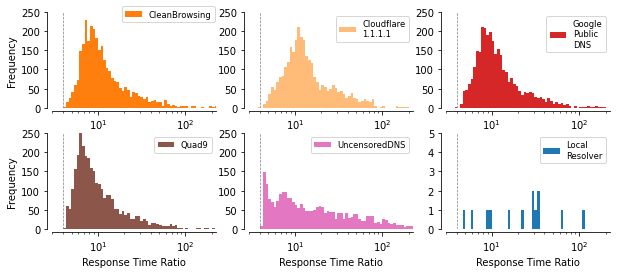

In [14]:
fig, axs = plt.subplots(figsize=(10,4), ncols=3, nrows=2, sharex=False, sharey=False)

for ax, res in zip(axs.ravel(), resolvers):
    
    if res=='Local Resolver':
        local['dot_do53_ratio'].plot.hist(bins=np.logspace(0, 3, num=100), ax=ax,
                                          label=res.replace(' ', '\n'), color=colors[res])
        
        ax.set_ylim(0, 5)
        ax.set_yticks(np.arange(0,6,1))
        
        
    else:
        df = pub_res[pub_res['resolver_name'] == res]
        df['dot_do53_ratio'].plot.hist(bins=np.logspace(0, 3, num=100), ax=ax,
                                       label=res.replace(' ', '\n'), color=colors[res])
        
        ax.set_ylim(0, 150)
        ax.set_yticks(np.arange(0,251,50))

    ax.set_xlim(3, 225)
    ax.set_xlabel('Response Time Ratio')
    ax.set_xscale('log')
    ax.axvline(4, linestyle='--', color='gray', linewidth=0.7)
    
    if res!='CleanBrowsing' and res!='Quad9':
        ax.set_ylabel('')
    
    if res=='CleanBrowsing' or res=='Cloudflare 1.1.1.1' or res=='Google Public DNS':
        ax.set_xlabel('')
    
    if res=='CleanBrowsing':
        ax.legend(loc='lower left', fontsize='small', bbox_to_anchor=(0.4,0.85))
    else:
        ax.legend(loc='best', fontsize='small')
    
    ax.grid(False)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.03))
    ax.spines['left'].set_position(('axes', -0.03))

plt.subplots_adjust(hspace=0.26)
fig.savefig('../plots/rtt-ratios.pdf', bbox_inches='tight')

fig.show()
    